# Analyzing NYC High School SAT Scores - Data Cleaning Project

The objective of this project is to examine relationships between Scholastic Aptitude Test (SAT) scores and demographic factors in New York City public high schools. Eight datasets published by New York City were merged together into one dataframe. Data Cleaning and Exploratory Data Analysis were conducted in order to discover the answers to the following questions:
- Are there any ethnic differences in SAT scores?
- Do Female students outperform Male students in SAT scores?
- Is there a strong correlation between high school students who take Advanced Placement (AP) exams and SAT scores?

### Summary of Results
White & Asian students had a positive correlation to SAT scores and Hispanic & Black students had a negative correlation to SAT scores.  There is a weak correlation between Gender and SAT scores; Females had a positive relationship and Males had a negative relationship with SAT score. Safety and respect scores rated by student and teachers had a high correlation with SAT scores. Correlation does not necessarily mean causation and further analysis needs to be conducted to prove that there is a cause and effect relationship. 



### Store CSV files inside a Dictionary

In [90]:
# import libraries 
import pandas as pd
import numpy
import re
import matplotlib.pyplot as plt
%matplotlib inline

# Create list of csv file names
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

# Create am empty dictionary
data = {}

# Read all the csv files and store them in the dictonary 
for f in data_files:
    d = pd.read_csv(format(f)) # read the data onto d 
    data[f.replace(".csv", "")] = d # set key to the name of file excluding .csv and assign the key the pandas dataframe

### Concatenate the survey files 

In [91]:
# Read the .txt survey files
all_survey = pd.read_csv("survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("survey_d75.txt", delimiter="\t", encoding='windows-1252')

#Concatenate the .txt survey files to a single pandas dataframe
survey = pd.concat([all_survey, d75_survey], axis=0)

survey.head()


N_p    N_s   N_t  aca_p_11  aca_s_11  aca_t_11  aca_tot_11    bn  \
0   90.0    NaN  22.0       7.8       NaN       7.9         7.9  M015   
1  161.0    NaN  34.0       7.8       NaN       9.1         8.4  M019   
2  367.0    NaN  42.0       8.6       NaN       7.5         8.0  M020   
3  151.0  145.0  29.0       8.5       7.4       7.8         7.9  M034   
4   90.0    NaN  23.0       7.9       NaN       8.1         8.0  M063   

   com_p_11  com_s_11   ...    t_q8c_1  t_q8c_2  t_q8c_3 t_q8c_4  t_q9  \
0       7.6       NaN   ...       29.0     67.0      5.0     0.0   NaN   
1       7.6       NaN   ...       74.0     21.0      6.0     0.0   NaN   
2       8.3       NaN   ...       33.0     35.0     20.0    13.0   NaN   
3       8.2       5.9   ...       21.0     45.0     28.0     7.0   NaN   
4       7.9       NaN   ...       59.0     36.0      5.0     0.0   NaN   

   t_q9_1  t_q9_2  t_q9_3  t_q9_4  t_q9_5  
0     5.0    14.0    52.0    24.0     5.0  
1     3.0     6.0     3.0    78.0     9.0  
2     3.0     5.0    16.0    70.0     5.0  
3     0.0    18.0    32.0    39.0    11.0  
4    10.0     5.0    10.0    60.0    15.0  

[5 rows x 2773 columns]

The survey dataframe has over 2,500 columns and will be shortened to a list with less than 25 columns to focus on the most important aspects. 

In [93]:
# Create a new column with a capitalized name for dbn
survey["DBN"] = survey["dbn"]

#Create list of desired survery column name to subset the survey later
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
# Subset the survey dataframe to the columns listed in survey_fields
survey = survey.loc[:,survey_fields]
# Add survey to the data dictionary
data["survey"] = survey

survey.head()

DBN  rr_s  rr_t  rr_p    N_s   N_t    N_p  saf_p_11  com_p_11  eng_p_11  \
0  01M015   NaN    88    60    NaN  22.0   90.0       8.5       7.6       7.5   
1  01M019   NaN   100    60    NaN  34.0  161.0       8.4       7.6       7.6   
2  01M020   NaN    88    73    NaN  42.0  367.0       8.9       8.3       8.3   
3  01M034  89.0    73    50  145.0  29.0  151.0       8.8       8.2       8.0   
4  01M063   NaN   100    60    NaN  23.0   90.0       8.7       7.9       8.1   

      ...      eng_t_11  aca_t_11  saf_s_11  com_s_11  eng_s_11  aca_s_11  \
0     ...           7.6       7.9       NaN       NaN       NaN       NaN   
1     ...           8.9       9.1       NaN       NaN       NaN       NaN   
2     ...           6.8       7.5       NaN       NaN       NaN       NaN   
3     ...           6.8       7.8       6.2       5.9       6.5       7.4   
4     ...           7.8       8.1       NaN       NaN       NaN       NaN   

   saf_tot_11  com_tot_11  eng_tot_11  aca_tot_11  
0         8.0         7.7         7.5         7.9  
1         8.5         8.1         8.2         8.4  
2         8.2         7.3         7.5         8.0  
3         7.3         6.7         7.1         7.9  
4         8.5         7.6         7.9         8.0  

[5 rows x 23 columns]

The survey dataframe now has 23 columns which is a lot easier to interpret compared to over 2,500 columns

### Add DBN column to class_size dataframe

In [94]:
# Create a new column with a capitalized name for dbn
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

# Create a new function to convert number to string and return a two-value string 
def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation
    
# Apply pad_csd to class size object for column CSD
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)

# Create a new DBN for class_size that combines the padded_csd and school code 
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

### Convert columns to numeric

In [95]:
# Create a list of columns names that need to be converted to numeric
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']

# Execute conversion for the columns in sat_results dataframe
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

### Condense datasets

In [96]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

class_size = class_size.groupby("DBN").agg(numpy.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size

data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

### Convert AP scores to numeric

In [97]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

### Combine the datasets

In [98]:
# Set datafram to data - sat_results initially
combined = data["sat_results"]

# Combine the columns from sat_results with ap_2010 using a left join 
#(all rows from sat_results and only the rows from ap_2010 that share the same rows in DBN column)
combined = combined.merge(data["ap_2010"], on="DBN", how="left")

# Combine the columns from sat_results & ap_2010 with graduation using a left join 
combined = combined.merge(data["graduation"], on="DBN", how="left")

# create a list of the names of the other dataframes to merge to the combined dataframe
to_merge = ["class_size", "demographics", "survey", "hs_directory"]

# Merge the columns from the combined dataframe to the other dataframes listed in to_merge
# with an inner join that share the same rows in the DBN column
for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

# Clean database, fill all na values with the mean for numeric columns 
combined = combined.fillna(combined.mean())
# Clean database, fill all na values with 0 for categorical columns (string)
combined = combined.fillna(0)

### Add a school district column for mapping

In [99]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)

In [100]:
# Explore combined dataset
combined.head(5)

DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                     44                            390.0   
4                    159                            522.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3                433.0                   384.0     1207.0   
4                574.0                   525.0     1621.0   

                       SchoolName  AP Test Takers   Total Exams Taken  \
0                               0       129.028846         197.038462   
1    UNIVERSITY NEIGHBORHOOD H.S.        39.000000          49.000000   
2          EAST SIDE COMMUNITY HS        19.000000          21.000000   
3                               0       129.028846         197.038462   
4  NEW EXPLORATIONS SCI,TECH,MATH       255.000000         377.000000   

      ...                           priority05 priority06 priority07  \
0     ...      Then to New York City residents          0          0   
1     ...                                    0          0          0   
2     ...                                    0          0          0   
3     ...                                    0          0          0   
4     ...                                    0          0          0   

  priority08  priority09 priority10  \
0          0           0          0   
1          0           0          0   
2          0           0          0   
3          0           0          0   
4          0           0          0   

                                          Location 1        lat        lon  \
0  220 Henry Street\r\nNew York, NY 10002\r\n(40....  40.713764 -73.985260   
1  200 Monroe Street\r\nNew York, NY 10002\r\n(40...  40.712332 -73.984797   
2  420 East 12 Street\r\nNew York, NY 10009\r\n(4...  40.729783 -73.983041   
3  145 Stanton Street\r\nNew York, NY 10002\r\n(4...  40.720569 -73.985673   
4  111 Columbia Street\r\nNew York, NY 10002\r\n(...  40.718725 -73.979426   

  school_dist  
0          01  
1          01  
2          01  
3          01  
4          01  

[5 rows x 160 columns]

### Find correlations between SAT scores and demographic factors

In [101]:
# Compute correlations
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent         

The highest correlations are related to the different sections of the test: SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score. Since these scores make up the SAT score, it is irrelavant in terms of analyzing the relationships between demographic factors and SAT score. 

### Plotting survey correlations

In [102]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")

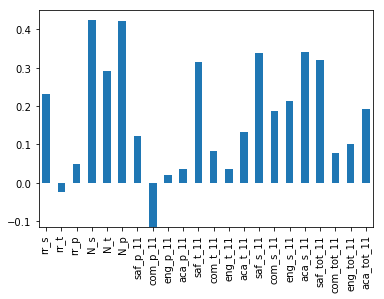

In [103]:
combined.corr()["sat_score"][survey_fields].plot.bar()

As shown above, number of student, teacher and parent respondents are the most correlated to higher sat scores. This is due to the correlation to higher enrollment. As well, safety and respect scores conducted by teachers are students had a high correlation with sat scores. 


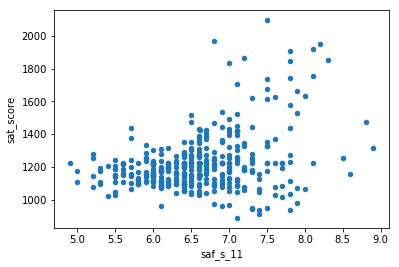

In [104]:

combined.plot.scatter(x="saf_s_11",y="sat_score")

From the scatter plot above, we can see that there is an existing correlation between safety perception and sat score but not exactly a high correlation between the two. Some points that have the highest safety perception do not necessarily have the highest sat scores and vice versa. Overall, it is quite correlated as most points are scattered along the correlation line. 

In [105]:
race = [
    "white_per",
    "asian_per",
    "black_per",
    "hispanic_per"]


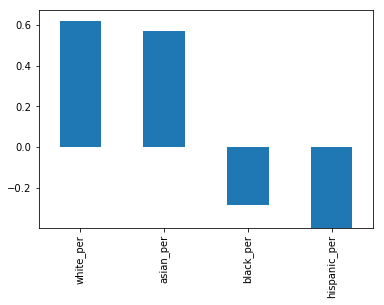

In [106]:

combined.corr()["sat_score"][race].plot.bar()

The results were quite surprising as there is a large discrepancy between white/asian and black/hispanic. White/Asian had a possible correlation whereas black/hispanic had a negative correlation with sat scores. There are big differences between causal relationships and correlations so more analysis needs to be conducted before claiming there is a cause and effect relationship between ethnicity and SAT score. 


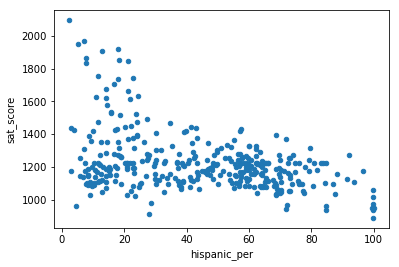

In [107]:
combined.plot.scatter(x="hispanic_per",y="sat_score")

As shown above, we can see a negative best of line fit in the scatter plot. A higher hispanic percentage is related to a lower sat score.

In [108]:
greater = combined["hispanic_per"]> 95
greaterthan = combined[greater]

In [109]:
greaterthan["SCHOOL NAME"]

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

Check the location of each school
Find out what is interesting by these schools - google it

In [110]:
gender=["male_per","female_per"]

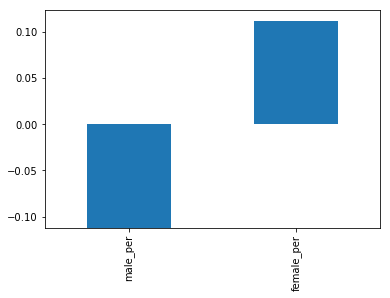

In [111]:
combined.corr()["sat_score"][gender].plot.bar()

Considering that in the past only males were allowed to go to university, it is unexpecting to see that there is a positive relationship between female students and sat score and vice-versa for male students. 

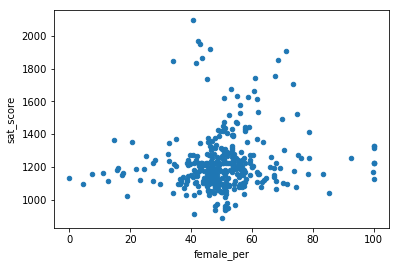

In [112]:
combined.plot.scatter(x="female_per",y="sat_score")

According to the scatter plot, there is no correlation between a high sat_score and a highe female_per. Most schools seem to 

In [113]:
female = combined["female_per"]>60
satfem = combined["sat_score"]>1700
femschools = combined[female & satfem]

In [114]:
femschools["SCHOOL NAME"]

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

Google each school to find interesting information about these particular schools~ 

In [115]:
combined["ap_per"]=combined["AP Test Takers "]/combined["total_enrollment"]

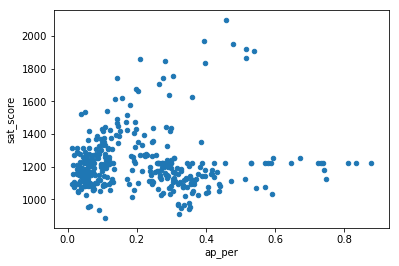

In [116]:
combined.plot.scatter(x="ap_per",y="sat_score")

There is an unclear correlation relationship between % of students in each school that took an AP exam and higher SAT scores. As ap_per rises, most data points are plateauing after 40% at a sat score of 1200. 

### Conclusion

After the analysis, it was discovered that Hispanic & Black students had a negative correlation to SAT scores as White & Asian students had a positive correlation to SAT scores. Females had a positive relationship and Males had a negative relationship with SAT scores. Safety and respect scores rated by student and teachers had a high correlation with SAT scores. It is important that correlation and causation are two very different things and further analysis need to be conducted to determine if there is a cause and effect relationship.  



